In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import pandas as pd
import numpy as np

from sklearn import datasets

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score
from prettytable import PrettyTable

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import category_encoders

In [2]:
def loadData(directory):
    df = pd.read_csv(directory,sep="\t")
    return df

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

#X_dev['length_description'] = X_dev['description'].apply(lambda x : len(x))
#X_dev = X_dev.drop_duplicates()
#X_eval['length_description'] = X_eval['description'].apply(lambda x : len(x))

X_dev = X_dev.drop(columns=['description','region_2'])
X_eval = X_eval.drop(columns=['description','region_2'])

In [3]:
## BinatyEncoding
def doPreprocV1(X_d,X_e,labels):
    
        
    df = pd.concat([X_d,X_e])

    encoder = category_encoders.BinaryEncoder(cols=labels)
    df = encoder.fit_transform(df)
    
    ev = df[df['quality'].isna()].drop(columns=['quality'])
    dev = df.dropna(subset=['quality'])

    return dev, ev

## BinatyEncoding + PCA
def doPreprocV2(X_d,X_e,labels):
        
    df = pd.concat([X_d,X_e])

    encoder = category_encoders.BinaryEncoder(cols=labels)
    df = encoder.fit_transform(df)
    
    pca = pca(n_components = 0.95)
    df_reduced = pca.fit_transform(df)
    
    
    ev = df_reduced[df_reduced['quality'].isna()].drop(columns=['quality'])
    dev = df_reduced.dropna(subset=['quality'])

    return dev, ev

In [ ]:
"""
 for label in labels:
        top_labels = Counter(X[label]).most_common()[:int(len(Counter(X[label]).most_common())*80/100)]
        top_labels = [elem[0] for elem in top_labels]
        
        X[label] = X.apply(lambda x : hash(x[label]) if x[label] in top_labels else hash(0),axis=1)
    return X
"""

In [5]:
X_prep_v1, X_eval_v1 = doPreprocV1(X_dev,X_eval,['country','province','variety',
                                                  'winery','region_1','designation'])
y1 = X_prep_v1.quality
X1 = X_prep_v1.drop(columns=['quality'])

In [17]:
len(X_prep_v1)

120744

In [ ]:
X_prep_v2, X_eval_v2 = doPreprocV2(X_dev,X_eval,['country','province','variety',
                                                  'winery','region_1','designation'])
y2 = X_prep_v2.quality
X2 = X_prep_v2.drop(columns=['quality'])

In [70]:
y1.shape

(85028,)

### Preprocessing

In [3]:
# encode with average

## Model selection
\# -- specificare la misura di riferimento (accuracy o altro) <br /><br />
In order to tune the best models, we tested #tot different classifiers with their default hyperparameters through the Repeated K-Fold Cross Validation. This gives a more “robust” model assessment score rather than the fairly well known K-Fold Cross Validation, because it run several times. In this case we used 5 folds and 10 ierations. The algorithms that we tested are: 
- **
- **

The output of the the Cross Validation phase can be clearly seen in Figure # . So we decided to tune the \\ and the \\ classifiers trough the Grid Search, as explained in the next section. 

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

randomforest = RandomForestRegressor()
linearregression = LinearRegression()
sgd = SGDRegressor()

#polynomialregression = make_pipeline(PolynomialFeatures(10), LinearRegression())
#polynomialregression.fit(X, y)


models = [randomforest]
targets = ["RandomForest"]

In [8]:
def evaluateModels(models, targets,X,y):
    
    scores = pd.DataFrame()
    
    for model,target in zip(models,targets):
        cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)
        scores[target] = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
        
    return scores

Text(0, 0.5, 'R2_Score')

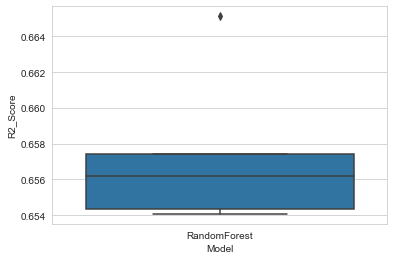

In [84]:
## V1 without duplicayes
scores = evaluateModels(models,targets,X1,y1)
sns.boxplot(x="variable", y="value", data=pd.melt(scores))
plt.xlabel("Model")
plt.ylabel("R2_Score")

Text(0, 0.5, 'R2_Score')

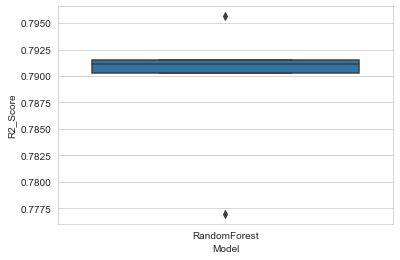

In [9]:
## V1 w/ duplicates
scores = evaluateModels(models,targets,X1,y1)
sns.boxplot(x="variable", y="value", data=pd.melt(scores))
plt.xlabel("Model")
plt.ylabel("R2_Score")

In [ ]:
## V2
scores = evaluateModels(models,targets,X2,y2)
sns.boxplot(x="variable", y="value", data=pd.melt(scores))
plt.xlabel("Model")
plt.ylabel("R2_Score")

## Hyperparameter tuning
In order to improve the performances of the selected models we used the GridSearchCV that performs a Cross Validation over all the combinations of a given set of hyperparameters. Since we had enough data, we used the hold out technique, so we considered 80% for the train data and the remaining 20% for the testing the models. 

## Results
The results of the hyperparameters tuning can be seen in Table ##. Apparently they all outperformed their naive solutions and \[brodo\] 

In [10]:
def doGridSearch(model,model_name,hyperparams,X,y):
    gs = GridSearchCV(estimator=model,  
                         param_grid=hyperparams,
                         scoring='r2',
                         cv=4,
                         n_jobs=6,
                         verbose=True)

    gs.fit(X, y)
    return gs

In [11]:
hyperparams_RF = {
    "n_estimators": [500],
    #"criterion": ["mse", "mae"],
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": [42],# always use the samet random seed
    "n_jobs": [-1],# for parallelization
}

In [12]:
gs = doGridSearch(RandomForestRegressor(verbose=True), "RandomForestRegressor",hyperparams_RF,X1,y1)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  12 out of  12 | elapsed: 10.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished


In [13]:
print(f"Best params:\t{gs.best_params_}")
print(f"Best score:\t{gs.best_score_}")

Best params:	{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1, 'random_state': 42}
Best score:	0.7827303010425452


## Deploy

In [14]:
y_pred = gs.predict(X_eval_v1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.3s finished


In [15]:
def get_csv(ids, y):
    pd.DataFrame(dict(Id = ids,Predicted = y)).to_csv("submission4.csv",sep=",",index=False)

In [16]:
get_csv(list(X_eval.index),y_pred)

## Deploy history

### Submission 1 : 0.756 | 2021-01-11 16:24:05.639162 	
* without duplicates
* Preprocessing: hash <br />
* Model : Random Forest <br />
* Hyperparams: {'max_features': 'sqrt', 'n_estimators': 500, 'n_jobs': -1, 'random_state': 42} <br />
* features : country,province,region_1, variety, winery, length_description <br />

### Submission 2 : 0.807 | 2021-01-12 08:14:14.977122	
* without duplicates
* Preprocessing: hash <br />
* Model : Random Forest <br />
* Hyperparams: {'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1, 'random_state': 42}
* features : country,province,region_1, variety, winery, designation <br />

### Submission 3 : 0.822 | 2021-01-12 08:56:40.440284
* without duplicates
* Preprocessing: BinaryEncoding <br />
* Model : Random Forest <br />
* Hyperparams: {'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1, 'random_state': 42}
* features : country,province,region_1, variety, winery, designation <br />

### Submission 4 : 0.823 | 2021-01-12 14:42:33.311053
* with duplicates -> we can drop them
* same as Submission 3

## //Test

In [22]:
from collections import Counter
a = Counter(X_dev['country']).most_common()

In [40]:
df = pd.DataFrame({
    'color':["a", "c", "a", "a", "b", "b"], 
    'outcome':[1, 2, 0, 0, 0, 1]})
